Notebook to create all the rasters with the maximum wind gust over the period of each storm in Europe land

In [1]:
import os
import sys
import pandas as pd
import xarray as xr

operating_system = 'curnagl'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabianaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/wind_map/')
sys.path.append(custom_library_path)

import wind_map

In [2]:
input_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/SL/'
variable = 'instantaneous_10m_wind_gust'
storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv', 
                          delimiter = ',')  
output_file = 'data/time_series_rasters_storms_15h'

In [ ]:
# index represents the year, 2003 and 2018 are missing because no storms were recorded / detected

years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
         2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
         2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020]
nb_hours = 15
for year in years:
    #print('Processing date', storm_dates['start_date'][year])
    wind_map.to_tiff(variable, storm_dates, input_path, output_file, year, nb_hours, level=0)

Processing data for year 1990...
Processing storm 0...
Saving raster for storm 1_C3S_STORM_TRACKS_ERA5...
Processing storm 1...
Saving raster for storm 2_DARIA...
Processing storm 2...
Saving raster for storm 3_C3S_STORM_TRACKS_ERA5...
Processing storm 3...
Saving raster for storm 7_HERTA...
Processing storm 4...
Saving raster for storm 4_C3S_STORM_TRACKS_ERA5...
Processing storm 5...
Saving raster for storm 6_WIEBKE...
Processing storm 6...
Saving raster for storm 5_VIVIAN...
Processing storm 7...
Saving raster for storm 8_C3S_STORM_TRACKS_ERA5...
Processing for year 1990 completed.
Processing data for year 1991...
Processing storm 8...
Saving raster for storm 9_C3S_STORM_TRACKS_ERA5...
Processing storm 9...
Saving raster for storm 10_C3S_STORM_TRACKS_ERA5...
Processing storm 10...
Saving raster for storm 11_C3S_STORM_TRACKS_ERA5...
Processing for year 1991 completed.
Processing data for year 1992...
Processing storm 11...
Saving raster for storm 12_C3S_STORM_TRACKS_ERA5...
Processing

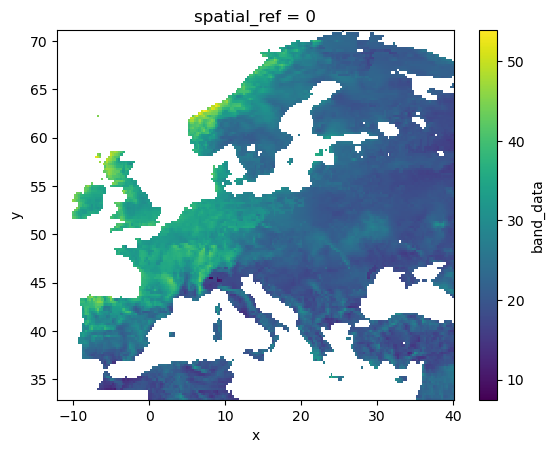

In [4]:
# combine all tiffs into one file with the maximum wind gust speed at each pixel

rasters = xr.open_mfdataset(f'{output_file}/*.tif', 
                            engine='rasterio', 
                            combine='nested', 
                            concat_dim='band')

max_all_storms = rasters['band_data'].max(dim='band')
#max_all_storms.plot()
#max_all_storms

i10fg = max_all_storms
 
i10fg = i10fg.rio.set_spatial_dims(x_dim='x', y_dim='y')
i10fg.rio.crs
i10fg.rio.write_crs("epsg:4326", inplace=True)
i10fg.rio.to_raster(f"{output_file}/max_all_storms.tif")

i10fg.plot.imshow()